In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
messages = pd.read_csv('SMSSpamCollection.txt', sep='\t', names=['label','message'])

In [4]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
messages.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
messages['label'] = encoder.fit_transform(messages['label'])#spam = 1 and ham = 0

In [9]:
messages.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Cleaning

In [10]:
messages.duplicated().sum()

403

In [11]:
messages.drop_duplicates(keep='first', inplace= True)

In [12]:
messages.reset_index(drop= True, inplace= True)

In [13]:
len(messages)

5169

In [14]:
messages['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

In [15]:
from imblearn.under_sampling import RandomUnderSampler

In [16]:
rus = RandomUnderSampler(random_state=42)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

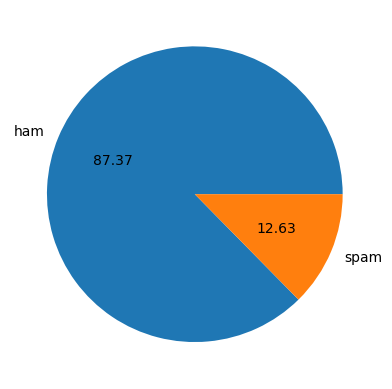

In [18]:
plt.pie(messages['label'].value_counts(), labels=['ham','spam'], autopct='%.2f')
plt.show()

In [19]:
import string
exclude = string.punctuation

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [21]:
def text_cleaning(text):
    text = text.lower()
    text = nltk.word_tokenize(text) 
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in exclude:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return ' '.join(y)
        

In [22]:
text_cleaning('Hello! How are you? Banana is 20 rupees')

'hello banana 20 rupe'

In [23]:
nltk.word_tokenize('Hello! How are you? Banana is 20 rupees')

['Hello', '!', 'How', 'are', 'you', '?', 'Banana', 'is', '20', 'rupees']

In [24]:
messages['cleaned_message']=messages['message'].apply(text_cleaning)

In [25]:
messages.head()

,label,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [26]:
messages['num_char'] = messages['cleaned_message'].apply(len)

In [27]:
messages['cleaned_message'][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [28]:
messages['num_words'] = messages['cleaned_message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
messages[['num_char','num_words']].describe()

,num_char,num_words
count,5169.00000,5169.000000
mean,45.60534,8.881989
std,34.81915,6.501280
min,0.00000,0.000000
25%,20.00000,4.000000
50%,34.00000,7.000000
75%,66.00000,13.000000
max,395.00000,75.000000


In [30]:
messages[messages['label'] == 1][['num_char','num_words']].describe()

,num_char,num_words
count,653.000000,653.000000
mean,86.574273,15.286371
std,25.007657,4.750436
min,5.000000,1.000000
25%,72.000000,12.000000
50%,89.000000,16.000000
75%,104.000000,18.000000
max,143.000000,28.000000


In [31]:
messages[messages['label'] == 0][['num_char','num_words']].describe()

,num_char,num_words
count,4516.000000,4516.000000
mean,39.681355,7.955934
std,31.930442,6.191199
min,0.000000,0.000000
25%,18.000000,4.000000
50%,30.000000,6.000000
75%,53.000000,10.000000
max,395.000000,75.000000


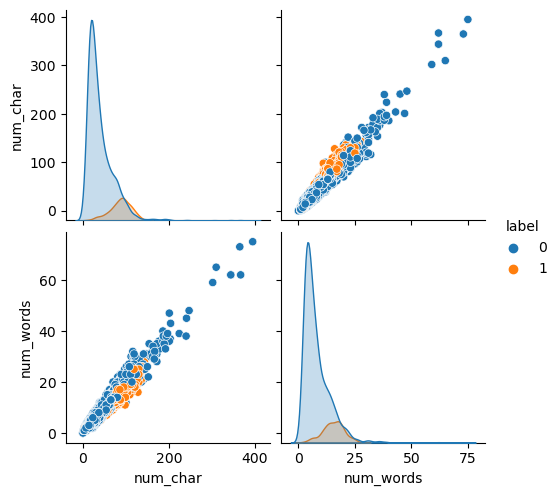

In [32]:
sn.pairplot(messages,hue= 'label')

In [33]:
from wordcloud import WordCloud

In [34]:
wc = WordCloud(width= 500, height= 500, min_font_size= 8, background_color='white')

In [35]:
spam_wc = wc.generate(messages[messages['label']==1]['cleaned_message'].str.cat(sep=' '))

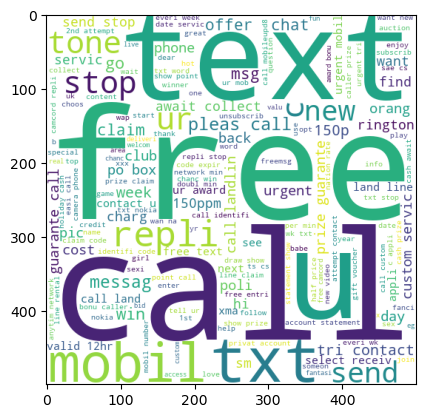

In [36]:
plt.imshow(spam_wc)

In [37]:
ham_wc = wc.generate(messages[messages['label']==0]['cleaned_message'].str.cat(sep=' '))

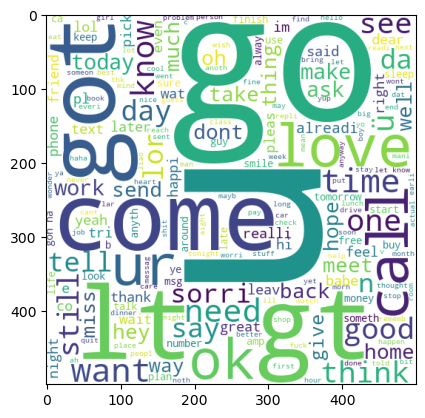

In [38]:
plt.imshow(ham_wc)

In [39]:
from collections import Counter

In [40]:
Counter(nltk.word_tokenize(messages['cleaned_message'].str.cat(sep=' ')))

Counter({'go': 440,
         'jurong': 1,
         'point': 32,
         'crazi': 15,
         'avail': 15,
         'bugi': 7,
         'n': 128,
         'great': 106,
         'world': 30,
         'la': 7,
         'e': 78,
         'buffet': 2,
         'cine': 7,
         'got': 245,
         'amor': 1,
         'wat': 109,
         'ok': 223,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 1017,
         'oni': 4,
         'free': 246,
         'entri': 21,
         '2': 443,
         'wkli': 9,
         'comp': 9,
         'win': 61,
         'fa': 2,
         'cup': 7,
         'final': 29,
         'tkt': 2,
         '21st': 2,
         'may': 46,
         'text': 207,
         '87121': 2,
         'receiv': 40,
         'question': 27,
         'std': 6,
         'txt': 154,
         'rate': 29,
         'c': 103,
         'appli': 28,
         '08452810075over18': 1,
         'dun': 55,
         'say': 128,
         'earli': 33,
         'hor': 2,

In [41]:
Counter(nltk.word_tokenize(messages[messages['label']==1]['cleaned_message'].str.cat(sep=' '))).most_common(10)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 120),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 108),
 ('repli', 103)]

In [42]:
Counter(nltk.word_tokenize(messages[messages['label']==0]['cleaned_message'].str.cat(sep=' '))).most_common(10)

[('u', 897),
 ('go', 407),
 ('get', 351),
 ('2', 288),
 ('gt', 288),
 ('lt', 287),
 ('come', 278),
 ('got', 239),
 ('know', 237),
 ('like', 236)]

In [43]:
messages['cleaned_message'][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [44]:
messages['cleaned_message'][1]

'ok lar joke wif u oni'

In [45]:
def remove_single_alpwords(text):
    y=[]
    for i in text.split():
        if len(i) > 1:
            y.append(i)
    return ' '.join(y)

In [46]:
remove_single_alpwords('go jurong point crazi avail bugi n great world la e buffet cine got amor wat')

'go jurong point crazi avail bugi great world la buffet cine got amor wat'

In [47]:
messages['cleaned_message'] = messages['cleaned_message'].apply(remove_single_alpwords)

## Model Building

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [49]:
tfidf = TfidfVectorizer()

In [50]:
X = tfidf.fit_transform(messages['cleaned_message']).toarray()

In [51]:
X.shape

(5169, 6782)

In [52]:
Y = messages['label']

In [53]:
Y.value_counts()

0    4516
1     653
Name: label, dtype: int64

In [54]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_sampled, Y_sampled = ros.fit_resample(X,Y)

In [57]:
X_sampled.shape

(9032, 6782)

In [58]:
Y_sampled.value_counts()

0    4516
1    4516
Name: label, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, Y_sampled, test_size= 0.2, random_state= 42)

In [60]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [61]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print('Accuracy Score =', accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[760 139]
 [  4 904]]
Accuracy Score = 0.920863309352518
              precision    recall  f1-score   support

           0       0.99      0.85      0.91       899
           1       0.87      1.00      0.93       908

    accuracy                           0.92      1807
   macro avg       0.93      0.92      0.92      1807
weighted avg       0.93      0.92      0.92      1807



In [64]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print('Accuracy Score =', accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2)) 

[[862  37]
 [ 16 892]]
Accuracy Score = 0.9706696181516326
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       899
           1       0.96      0.98      0.97       908

    accuracy                           0.97      1807
   macro avg       0.97      0.97      0.97      1807
weighted avg       0.97      0.97      0.97      1807



In [65]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print('Accuracy Score =', accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3)) 

[[899   0]
 [ 34 874]]
Accuracy Score = 0.9811842833425567
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       899
           1       1.00      0.96      0.98       908

    accuracy                           0.98      1807
   macro avg       0.98      0.98      0.98      1807
weighted avg       0.98      0.98      0.98      1807



In [129]:
test = 'I have gone through your project. The project seem to miss a few pointers. Let us connect over a call!'

In [164]:
test = 'Click on the link to claim your prize.'

In [165]:
test = text_cleaning(test)

In [166]:
test

'click link claim prize'

In [167]:
test_vec = tfidf.transform([test])

In [168]:
test_vec

<1x6782 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [169]:
predict = bnb.predict(test_vec)[0]

In [170]:
if (predict==0):
    print('New Message')
else:
    print('Spam')

Spam
